In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

sns.set_theme(style="whitegrid")

df = pd.read_csv('Credit.csv')

print("Podgląd danych:")
print(df.head())

# Preprocessing wstępny (zamiana zmiennych kategorycznych na liczbowe dla całego zbioru)
# Zakładamy, że kolumny tekstowe to np. Student, Married, Gender itp.
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nDane po zakodowaniu zmiennych kategorycznych:")
print(df.head())

Podgląd danych:
   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331  

Dane po zakodowaniu zmiennych kategorycznych:
   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender  Student  \
0           1   14.891   3606     283      2   34         11       0        0   
1           2  106.025   6645     483      3   82         15       1        1   
2           3  104.59

>>> REALIZACJA ZADANIA 12 A)

--- Wyniki dla: a) Przewidywanie dochodu > 50 ---
LR: Średnia dokładność: 0.9275 (+/- 0.0366)
KNN-3: Średnia dokładność: 0.7625 (+/- 0.0418)
KNN-5: Średnia dokładność: 0.7700 (+/- 0.0392)
KNN-9: Średnia dokładność: 0.7900 (+/- 0.0533)
KNN-50: Średnia dokładność: 0.7825 (+/- 0.0600)
DT-Depth3: Średnia dokładność: 0.8525 (+/- 0.0483)
DT-Full: Średnia dokładność: 0.8950 (+/- 0.0322)
RF-Est50: Średnia dokładność: 0.8900 (+/- 0.0578)
RF-Est100: Średnia dokładność: 0.8850 (+/- 0.0634)


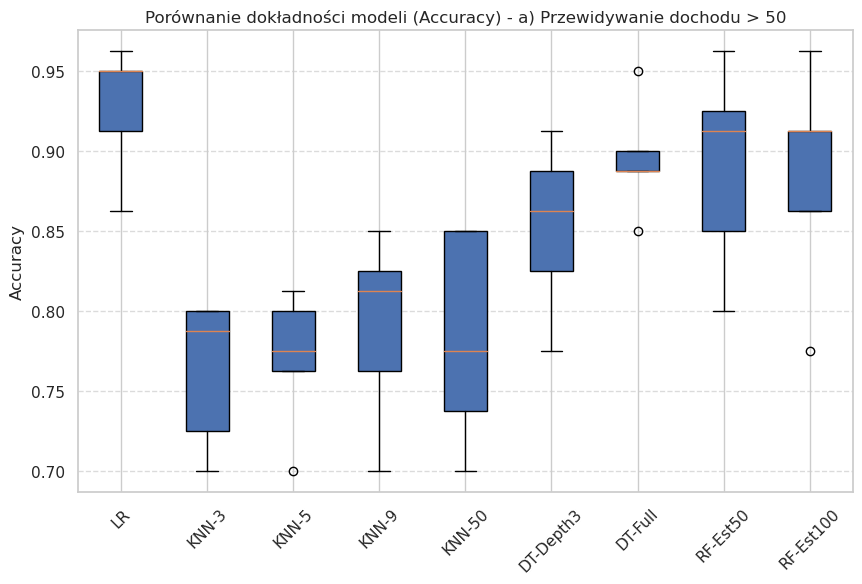


>>> REALIZACJA ZADANIA 12 B)

--- Wyniki dla: b) Przewidywanie liczby kart ---
LR: Średnia dokładność: 0.2575 (+/- 0.0595)
KNN-3: Średnia dokładność: 0.2450 (+/- 0.0269)
KNN-5: Średnia dokładność: 0.2275 (+/- 0.0278)
KNN-9: Średnia dokładność: 0.2375 (+/- 0.0209)
KNN-50: Średnia dokładność: 0.2400 (+/- 0.0496)
DT-Depth3: Średnia dokładność: 0.2625 (+/- 0.0524)
DT-Full: Średnia dokładność: 0.2400 (+/- 0.0634)
RF-Est50: Średnia dokładność: 0.2575 (+/- 0.0557)
RF-Est100: Średnia dokładność: 0.2575 (+/- 0.0497)


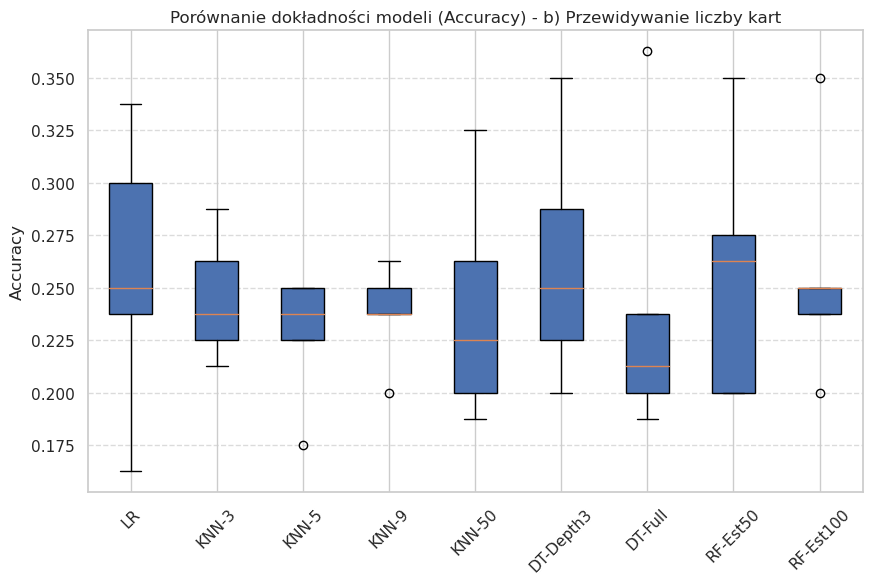

In [27]:
def compare_models(X, y, task_name="Zadanie"):
    """
    Funkcja przeprowadza walidację krzyżową dla kilku modeli i rysuje boxploty.
    """
    # Definicja modeli do sprawdzenia
    # Używamy pipeline dla modeli wymagających skalowania (LogReg, KNN)
    models = [
        ('LR', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))),
        ('KNN-3', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))),
        ('KNN-5', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))),
        ('KNN-9', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=9))),
        ('KNN-50', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=50))),
        ('DT-Depth3', DecisionTreeClassifier(max_depth=3, random_state=42)),
        ('DT-Full', DecisionTreeClassifier(random_state=42)),
        ('RF-Est50', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('RF-Est100', RandomForestClassifier(n_estimators=100, random_state=42))
    ]

    results = []
    names = []
    
    # KFold - walidacja krzyżowa
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    print(f"\n--- Wyniki dla: {task_name} ---")
    for name, model in models:
        # Cross validation score zwraca tablicę wyników (accuracy)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f"{name}: Średnia dokładność: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

    # Rysowanie Box-plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(results, labels=names, patch_artist=True)
    plt.title(f'Porównanie dokładności modeli (Accuracy) - {task_name}')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    return models

# --- PODPUNKT A: Czy Income > 50? ---
print(">>> REALIZACJA ZADANIA 12 A)")

# Tworzenie kopii danych
df_a = df.copy()

# Zmienna celu: 1 jeśli Income > 50, 0 w przeciwnym razie
df_a['Income_High'] = (df_a['Income'] > 50).astype(int)

# Usuwamy oryginalną zmienną Income
X_a = df_a.drop(columns=['Income', 'Income_High'])
y_a = df_a['Income_High']

# Uruchomienie porównania
models_list = compare_models(X_a, y_a, task_name="a) Przewidywanie dochodu > 50")

# --- PODPUNKT B: Ile kart kredytowych? ---
print("\n>>> REALIZACJA ZADANIA 12 B)")

df_b = df.copy()

y_b = df_b['Cards']
X_b = df_b.drop(columns=['Cards'])

compare_models(X_b, y_b, task_name="b) Przewidywanie liczby kart");

>>> WIZUALIZACJA ZADANIA 13 A)


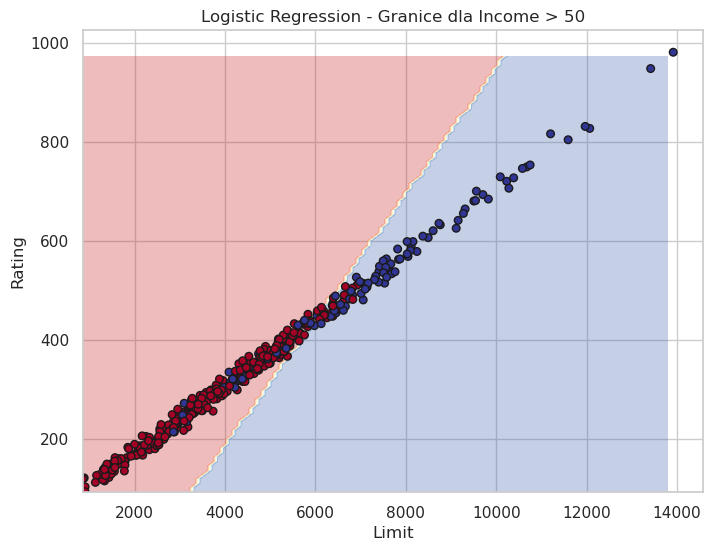

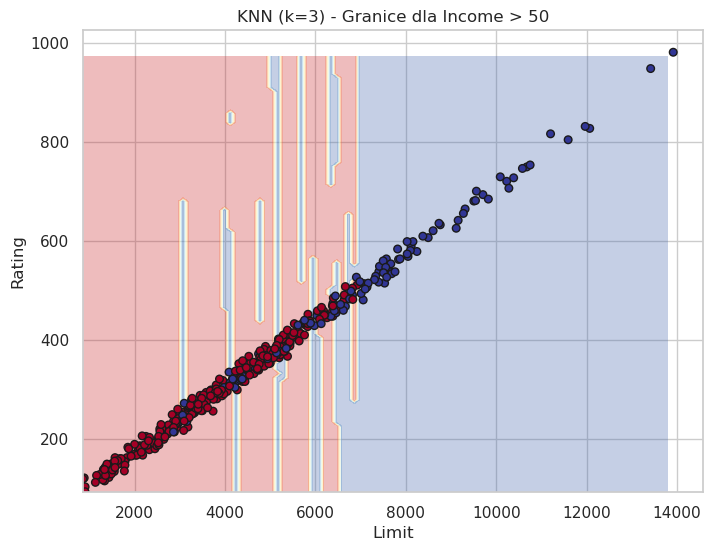

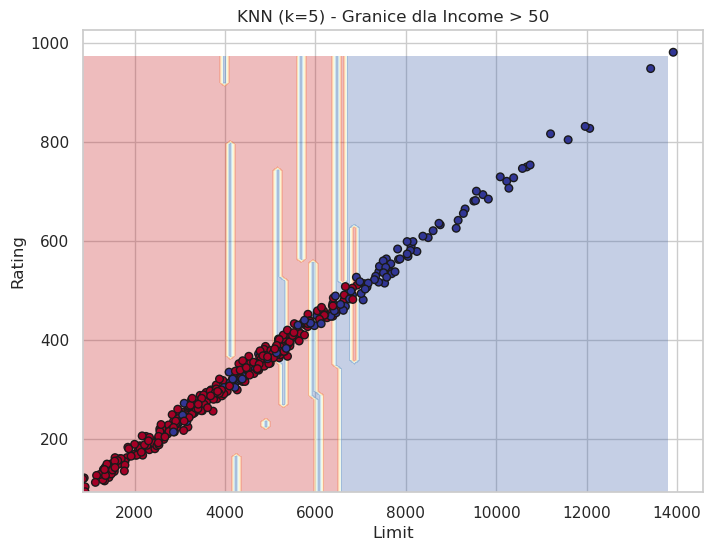

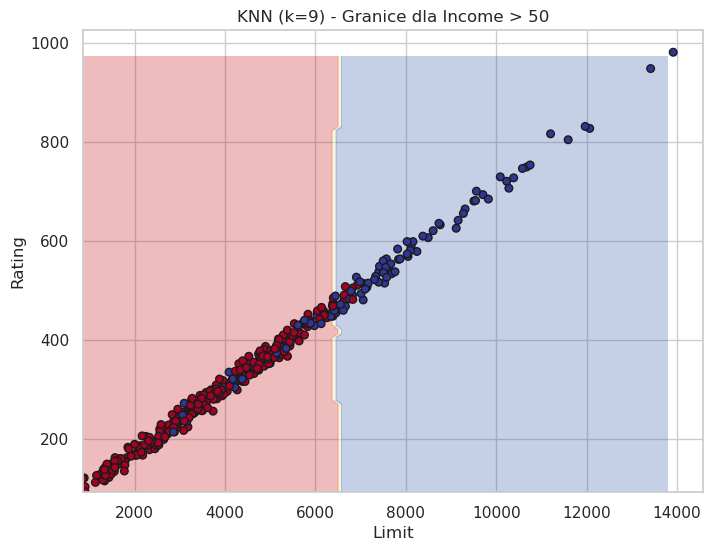

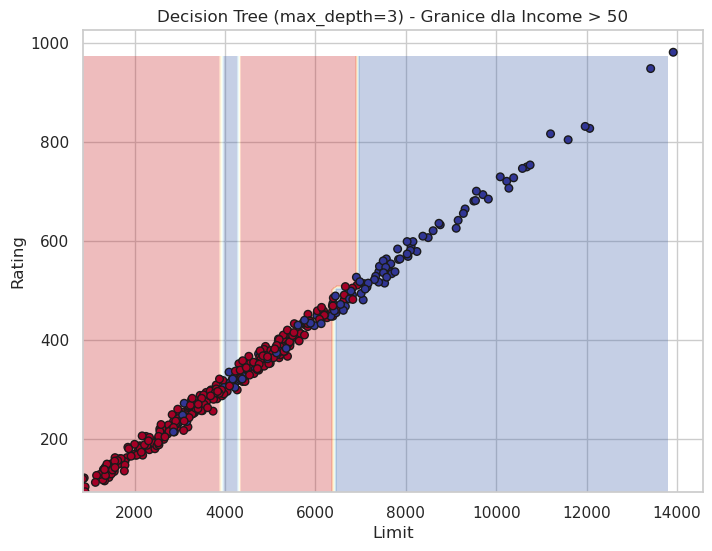

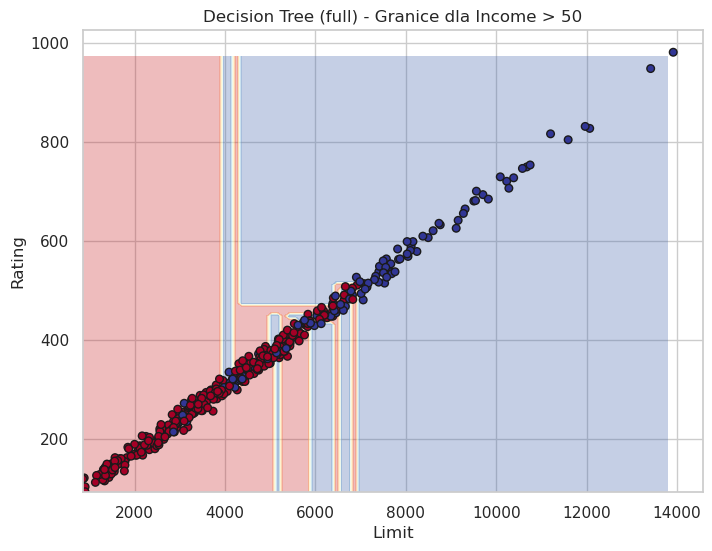

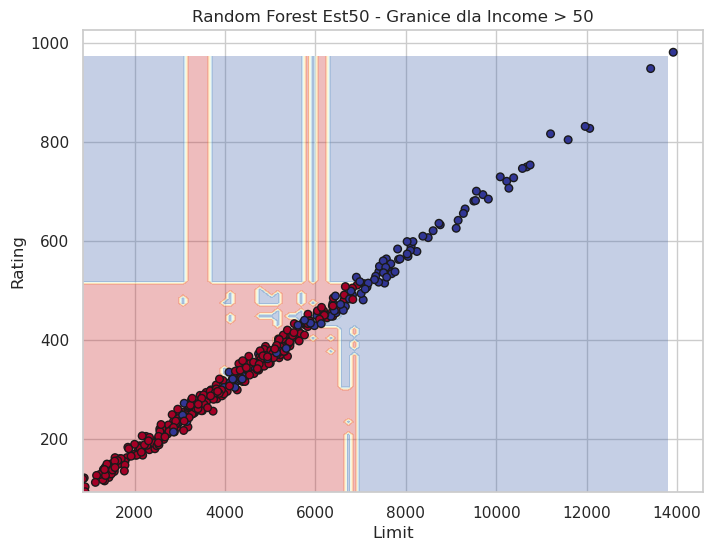

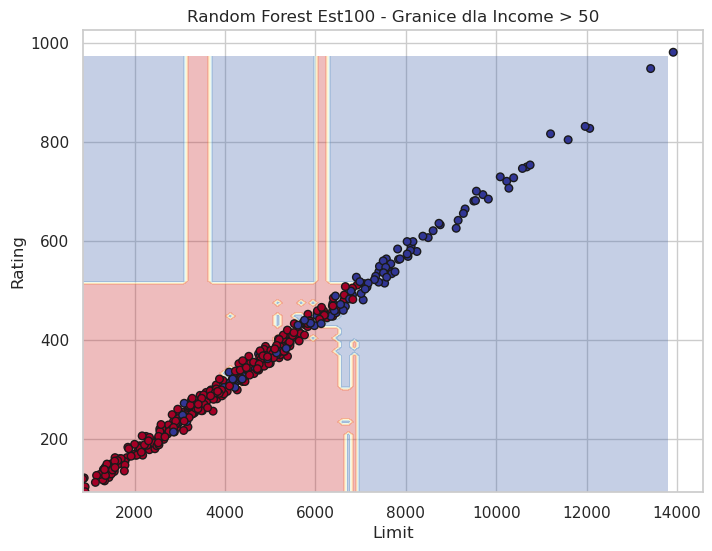


>>> WIZUALIZACJA ZADANIA 13 B)


/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


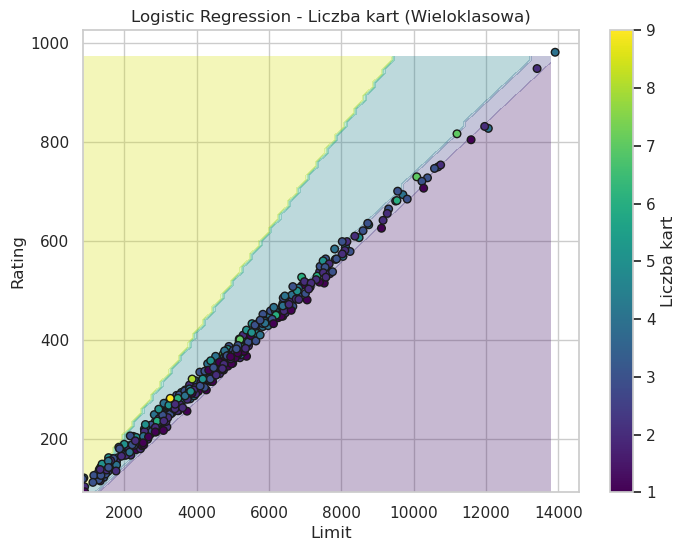

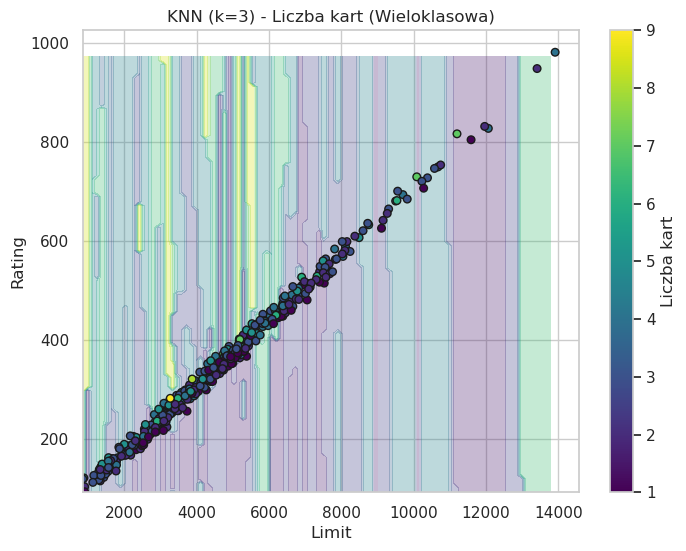

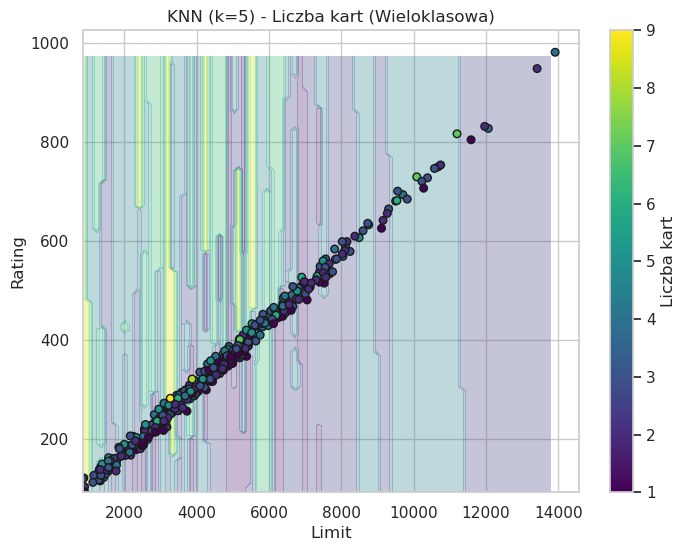

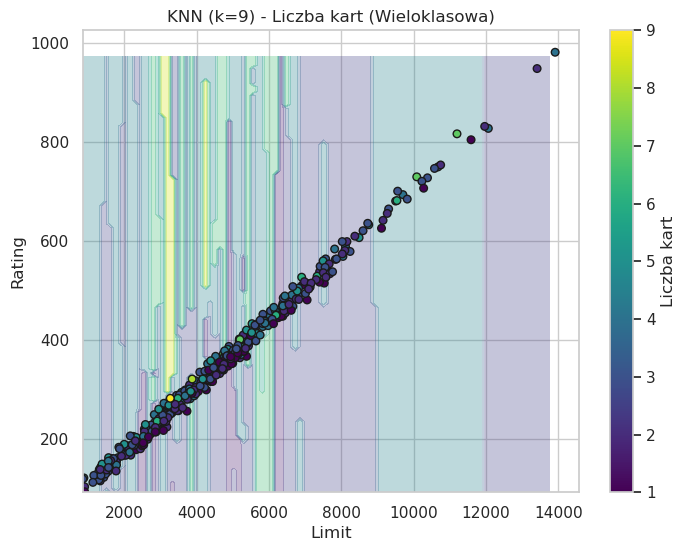

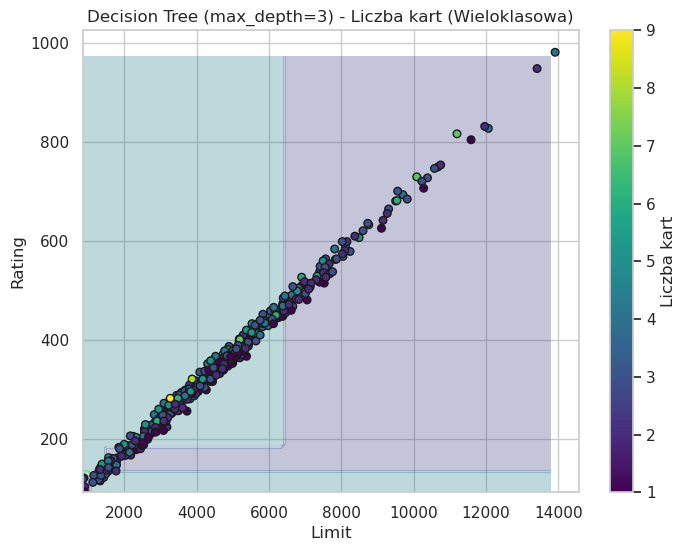

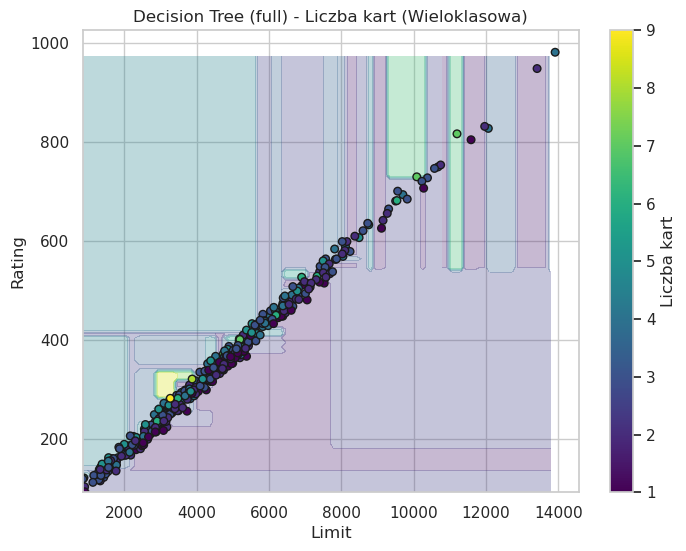

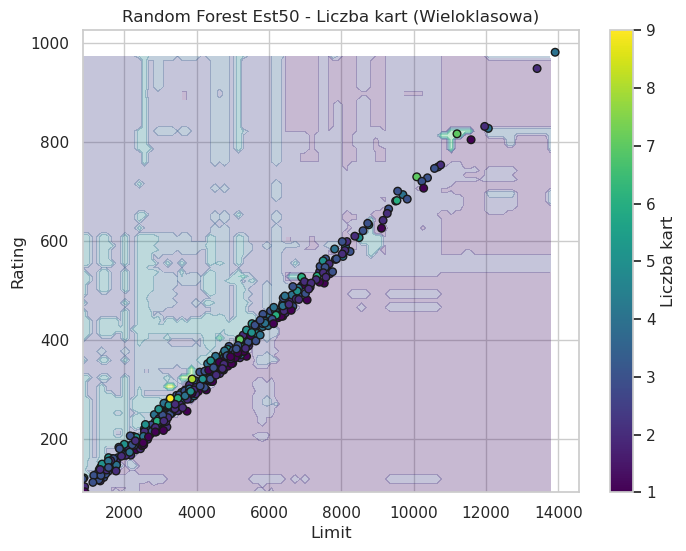

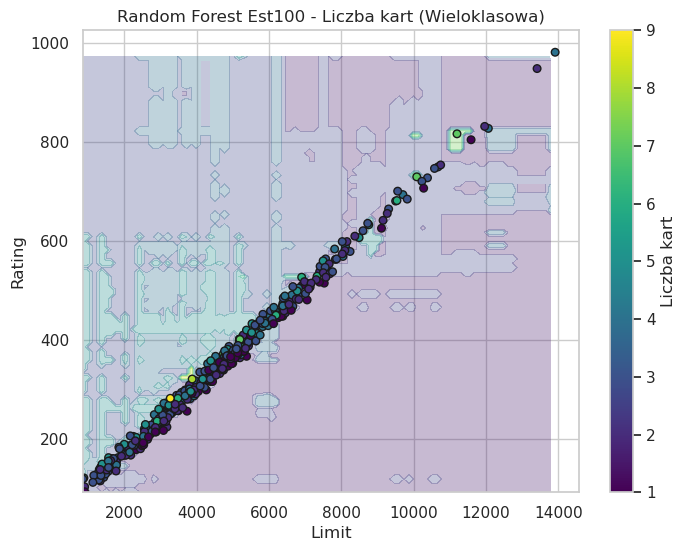

In [36]:
def plot_decision_boundaries(X, y, model_class, title, is_multiclass=False):
    """
    Rysuje granice decyzyjne dla wybranego modelu na podstawie 2 cech.
    """
    # Trenujemy model TYLKO na 2 cechach, aby móc narysować granice w 2D
    X_mat = X.values
    y_vec = y.values
    
    # Tworzenie instancji modelu i trenowanie
    clf = model_class
    clf.fit(X_mat, y_vec)

    # Parametry siatki (meshgrid)
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/100),
                         np.arange(y_min, y_max, (y_max-y_min)/100))

    # Predykcja dla każdego punktu siatki
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    
    # Wybór mapy kolorów
    cmap_background = plt.cm.RdYlBu if not is_multiclass else plt.cm.viridis
    cmap_points = plt.cm.RdYlBu if not is_multiclass else plt.cm.viridis
    
    # Rysowanie konturów (granic)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    
    # Rysowanie punktów danych
    scatter = plt.scatter(X_mat[:, 0], X_mat[:, 1], c=y_vec, s=30, edgecolor='k', cmap=cmap_points)
    
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(title)
    if is_multiclass:
        plt.colorbar(scatter, ticks=np.unique(y_vec), label='Liczba kart')
    plt.show()

# Wybór dwóch ciągłych predyktorów
# feature_1 = 'Rating'
feature_1 = 'Limit'
feature_2 = 'Rating'
# feature_2 = 'Balance' 
# feature_2 = 'Age' 
# feature_2 = 'Education'

# --- Wizualizacja dla problemu A) (Income > 50) ---
print(">>> WIZUALIZACJA ZADANIA 13 A)")
X_viz_a = df_a[[feature_1, feature_2]]
y_viz_a = df_a['Income_High']


plot_decision_boundaries(X_viz_a, y_viz_a, LogisticRegression(max_iter=1000), 
                         "Logistic Regression - Granice dla Income > 50")

plot_decision_boundaries(X_viz_a, y_viz_a, KNeighborsClassifier(n_neighbors=3), 
                         "KNN (k=3) - Granice dla Income > 50")
plot_decision_boundaries(X_viz_a, y_viz_a, KNeighborsClassifier(n_neighbors=5), 
                         "KNN (k=5) - Granice dla Income > 50")
plot_decision_boundaries(X_viz_a, y_viz_a, KNeighborsClassifier(n_neighbors=9), 
                         "KNN (k=9) - Granice dla Income > 50")

plot_decision_boundaries(X_viz_a, y_viz_a, DecisionTreeClassifier(max_depth=3, random_state=42), 
                         "Decision Tree (max_depth=3) - Granice dla Income > 50")
plot_decision_boundaries(X_viz_a, y_viz_a, DecisionTreeClassifier(random_state=42), 
                         "Decision Tree (full) - Granice dla Income > 50")

plot_decision_boundaries(X_viz_a, y_viz_a, RandomForestClassifier(n_estimators=50, random_state=42), 
                         "Random Forest Est50 - Granice dla Income > 50")
plot_decision_boundaries(X_viz_a, y_viz_a, RandomForestClassifier(n_estimators=100, random_state=42), 
                         "Random Forest Est100 - Granice dla Income > 50")


# --- Wizualizacja dla problemu B) (Liczba kart) ---
print("\n>>> WIZUALIZACJA ZADANIA 13 B)")
X_viz_b = df_b[[feature_1, feature_2]]
y_viz_b = df_b['Cards']

plot_decision_boundaries(X_viz_b, y_viz_b, LogisticRegression(max_iter=1000), 
                         "Logistic Regression - Liczba kart (Wieloklasowa)", is_multiclass=True)

plot_decision_boundaries(X_viz_b, y_viz_b, KNeighborsClassifier(n_neighbors=3), 
                         "KNN (k=3) - Liczba kart (Wieloklasowa)", is_multiclass=True)
plot_decision_boundaries(X_viz_b, y_viz_b, KNeighborsClassifier(n_neighbors=5), 
                         "KNN (k=5) - Liczba kart (Wieloklasowa)", is_multiclass=True)
plot_decision_boundaries(X_viz_b, y_viz_b, KNeighborsClassifier(n_neighbors=9), 
                         "KNN (k=9) - Liczba kart (Wieloklasowa)", is_multiclass=True)

plot_decision_boundaries(X_viz_b, y_viz_b, DecisionTreeClassifier(max_depth=3, random_state=42), 
                         "Decision Tree (max_depth=3) - Liczba kart (Wieloklasowa)", is_multiclass=True)
plot_decision_boundaries(X_viz_b, y_viz_b, DecisionTreeClassifier(random_state=42), 
                         "Decision Tree (full) - Liczba kart (Wieloklasowa)", is_multiclass=True)

plot_decision_boundaries(X_viz_b, y_viz_b, RandomForestClassifier(n_estimators=50, random_state=42), 
                         "Random Forest Est50 - Liczba kart (Wieloklasowa)", is_multiclass=True)
plot_decision_boundaries(X_viz_b, y_viz_b, RandomForestClassifier(n_estimators=100, random_state=42), 
                         "Random Forest Est100 - Liczba kart (Wieloklasowa)", is_multiclass=True)